# K Nearest Neighbors : Titanic Dataset.

## 1.) Defining the Question

#### This research is aimed at conducting an analysis on the titanic dataset to determined the survival status using the K-Nearest Neighbors classifier. The set contains different attributes of the people within the titanic ship and with a deeper understanding of this attributes we can get to predict the survival status of the people while analysing the factors influencing the death vs survival status of the people in the ship.


### a.) Specifying the Question

#### The questions we aim to specifically answer are:
#### * Who survived the titanic disaster?
#### * Which is the strongest predictor of survival status?
#### * What are the factors that affected the survival of a passenger?
#### * Would one survive the titanic disaster given the attributes within the set eg. Age,Passanger class,Fare etc? (What we aim to predict)

### b.) Defining the Metric for Sucsess

#### Our success will be determined by our ability to predict the survival status of a passenger with minimal error in classification.

### c.) Understanding the context

#### RMS Titanic was a British passenger liner operated by the White Star Line that sank in the North Atlantic Ocean on 15 April 1912, after striking an iceberg during her maiden voyage from Southampton to New York City leading to the deaths of more than 1,500 passengers and crew. 
#### It included passangers of different social classes,ages and genders .We aim to study the factors that may have influenced the survival status of the passangers and with this we can predict the probability of survival of a passanger.

### d.) Experimental Design

#### This experiment will involve review and cleaning of the dataset while performing exploratory data analysisof both the training and testing set. We know well that our main objective is the prediction of survival status of the passengers.I will inturn optimize our model using different training and testing parameters with other optimization techiques fit for our models.
#### I will evaluate our model's classification skill and tune it to obtain the best estimator. I will provide further recomendation on how to improve the classifier into the best model.

### e.) Data Relevance

#### The data provided here in is relevant for analysis as it includes passenger information and the survival numbers of the actual titanic dataset. Our predictors are clearly defined and the target variable is clearly provided in the training set.
#### Pclass: refers to passenger class
#### Sbsp: refers to the siblings and spouse count.
#### Parch: refers to the parents and the childres count.
#### Embarked implies where the traveler mounted from. ie Southampton(S), Cherbourg(C), and Queenstown(C).


## 2.) Reading the Data

In [414]:
# Importing all the necessary libraries for my analysis
# EDA and Cleaning
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Feature Engineering ,Preprocessing and Modeling
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [415]:
# train_url=https://archive.org/download/train5_202002/train%20%285%29.csv
# test_url= https://archive.org/download/test1_202002/test%20%281%29.csv
def DataFrame(url):
    df=pd.read_csv(url)
    return(df)

In [416]:
# Reading the train set
train_df=DataFrame('https://archive.org/download/train5_202002/train%20%285%29.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [417]:
# Reading the test set
test_df=DataFrame('https://archive.org/download/test1_202002/test%20%281%29.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## 3.) Checking the data

#### Training set

In [418]:
# Checking the train dataset's properties
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [419]:
# Checking the extreemities of my training set
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [420]:
# Checking the shape of my set and the datatypes
def Shape(data):
    data.shape
    types=data.dtypes
    print("My dataset has ",data.shape[0],"rows and ",data.shape[1]," columns ")
    print(types)
        

In [421]:
# Getting the shape and datatypes of my training set for analysis
Shape(train_df)

My dataset has  891 rows and  12  columns 
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


#### Test set

In [422]:
# Head and tail of my set
test_df.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [423]:
# Extreemities of the test set
test_df.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [424]:
# Checking the shape and the datatypes of the test
Shape(test_df)

My dataset has  418 rows and  11  columns 
PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


## 4.) External Data Source Validation

#### The training set and the test set contain similar columns appart from the target variable thus the dataset is valid for analysis.

## 5.) Tidying the Dataset

## Training set Data Cleaning Proceedures

In [425]:
# A function to drop the unnecessary columns
def drop(data,col1,col2,col3,col4):
    df=data.drop(columns=[col1,col2,col3,col4],axis=1)
    return df

In [426]:
# Dropping the unnesessary columns
train_df1=drop(train_df,'PassengerId','Name','Ticket','Cabin')
train_df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Missing values in training set

In [427]:
#defining a function to plot missing values
def missing_plot(data):
    plt.figure(figsize=(12,4))
    sns.heatmap(data.isnull(),cbar=False,cmap='cividis',yticklabels=False)
    plt.title('Missing values in the dataset');


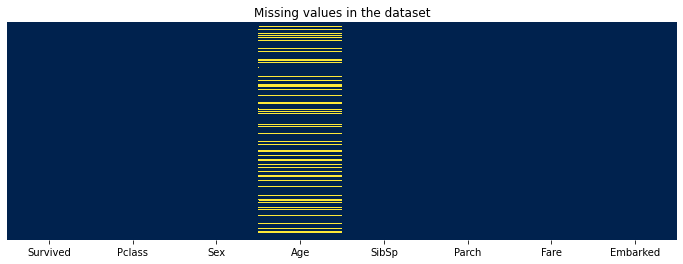

In [428]:
missing_plot(train_df1)

In [429]:
#Checking the percentage of null values
def missing_percentage(data):
    p_miss=((data.isnull().sum() / len(data))*100)
    missing_value_df=pd.DataFrame({'percent_missing': p_miss},index=data.columns)
    return missing_value_df

In [430]:
missing_percentage(train_df1)

,percent_missing
Survived,0.000000
Pclass,0.000000
Sex,0.000000
Age,19.865320
SibSp,0.000000
Parch,0.000000
Fare,0.000000
Embarked,0.224467


There are alot of missing values in the cabin class as compared to the age set. 

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


29.69911764705882
0    24.0
dtype: float64


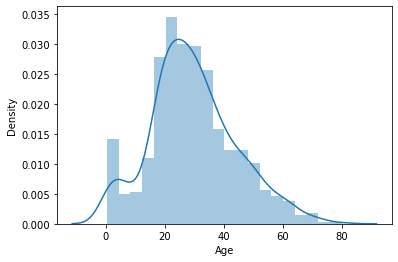

In [431]:
# Checking for the distribution of age set to enable filling of the columns 
sns.distplot(train_df1['Age'],kde=True)
print(train_df1['Age'].mean())
print(train_df1['Age'].mode())

In [432]:
# Filling the missing values with the mean age
def filling_missing(data,col):
    data[col].fillna(data[col].mean(),inplace=True)
    return data

In [433]:
# Filling age with the mean value
filling_missing(train_df1,'Age')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


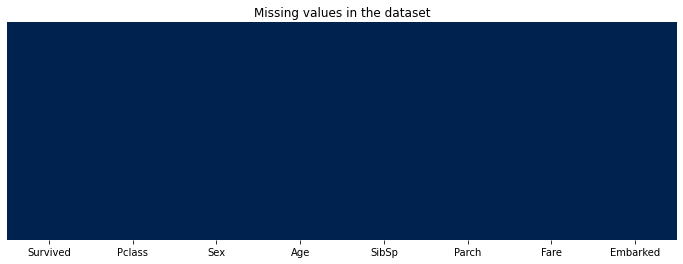

In [434]:
# Rechecking for missing values
missing_plot(train_df1)

In [435]:
# Embarked had missing values that we failed to detect using the plot
train_df1.isnull().any()

Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked     True
dtype: bool

In [436]:
# Since the percentage is .02 we can inturn drop it
train_df1.dropna(inplace=True)

#### Checking for Outliers in the training set

#### Discrete and Continous numerical variables

In [437]:
# A function to plot boxplots
def Box_plot(data,columns):
    plt.figure(figsize=(10,4))
    sns.boxplot(data[columns])
    plt.title('A box plot of '+format(columns))


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


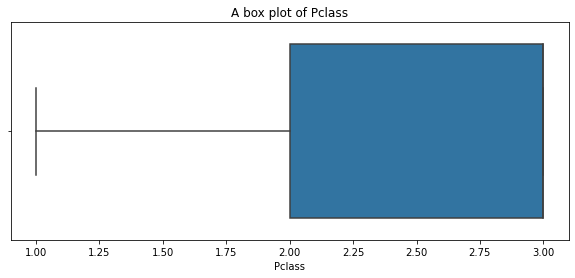

In [438]:
Box_plot(train_df1,'Pclass')
# There are no outliers in the passanger class set.

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


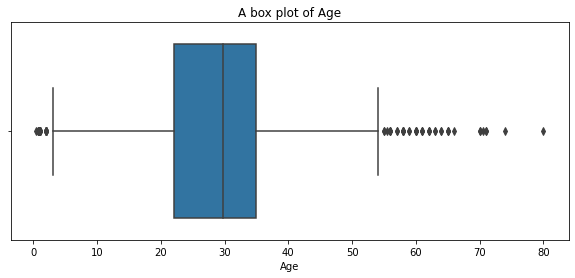

In [439]:
Box_plot(train_df1,'Age')
# There are some extreeme values past 80 years bt it is a legitimate age 

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


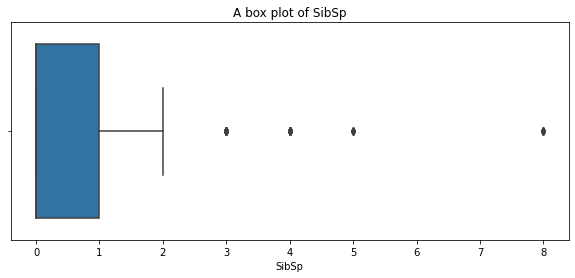

In [440]:
Box_plot(train_df1,'SibSp')
# The sibling and spouses count column has a few outliers which are way past the Interquantile range.
# It is however important to note that this will be treated as inliers to avoid loosing much data in the set. 

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


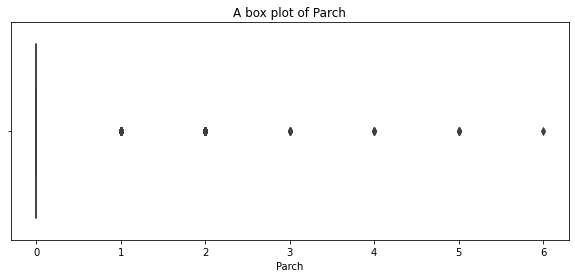

In [441]:
Box_plot(train_df1,'Parch')
# The number of parents and children are all legitimate

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


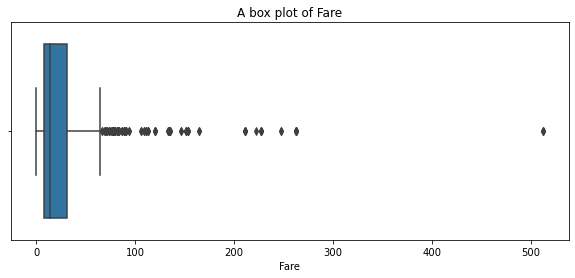

In [442]:
Box_plot(train_df1,'Fare')
# There is one outlier in the fate with the rate stated as more than 500. 
# I will treat that as an anomaly and deal eith it later

#### Categorical Columns

In [443]:
def Count_plot(data,column):
    fig=plt.figure(figsize=(10,4))
    sns.countplot(data[column],order=data[column].value_counts().index)
    plt.title('A count plot of '+ format(column))

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


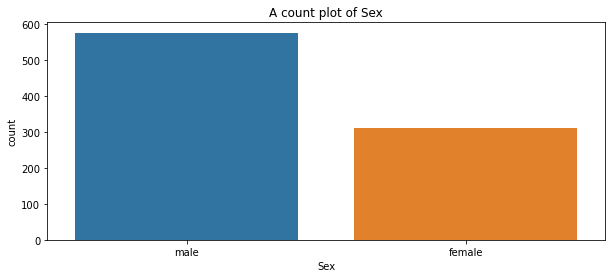

In [444]:
Count_plot(train_df1,'Sex')
# There are no anomalies not outliers here

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


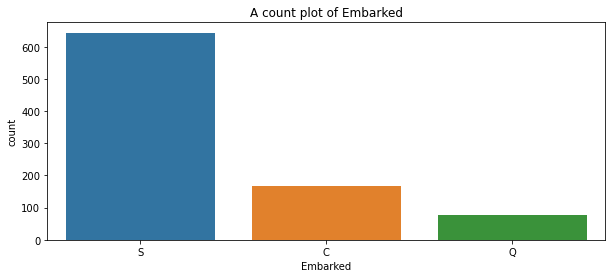

In [445]:
Count_plot(train_df1,'Embarked')
# No anomaly was detected in the embarked column.

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


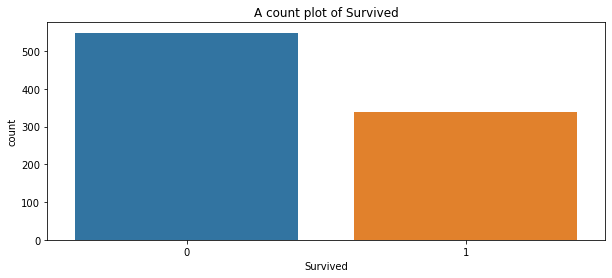

In [446]:
Count_plot(train_df1,'Survived')
# No anomaly was detected for the passangers that survived column.

#### Dealing with anomalies in the training set

There was an anomaly detected in the fares column. It is however important to note that this due to its maginitude will be dealt with during standadization.

## Testing set cleaning proceedure

In [450]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#### This set still has unnecssary columns and i can see some null values thus will conduct and almost similar data cleaning procedure

In [451]:
# Dropping unnecessary columns
test_df1=drop(test_df,'PassengerId','Name','Ticket','Cabin')
test_df1.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


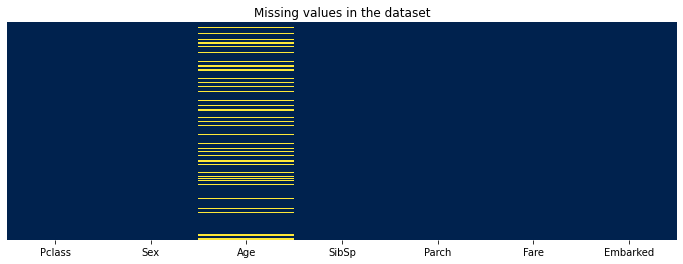

In [452]:
# Checking for missing values
missing_plot(test_df1)
# Age still has some missing values. 

30.272590361445783
0    21.0
1    24.0
dtype: float64


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


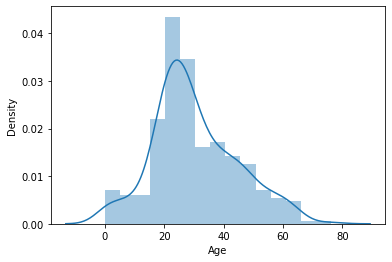

In [453]:
# rechecking its distribution to understand what to fill age with
sns.distplot(test_df1['Age'],kde=True)
print(test_df1['Age'].mean())
print(test_df1['Age'].mode())

In [454]:
# Filling the age with the mean to avoid compromising our dataset although its slightly skewed
filling_missing(test_df1,'Age')

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.50000,0,0,7.8292,Q
1,3,female,47.00000,1,0,7.0000,S
2,2,male,62.00000,0,0,9.6875,Q
3,3,male,27.00000,0,0,8.6625,S
4,3,female,22.00000,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,30.27259,0,0,8.0500,S
414,1,female,39.00000,0,0,108.9000,C
415,3,male,38.50000,0,0,7.2500,S
416,3,male,30.27259,0,0,8.0500,S


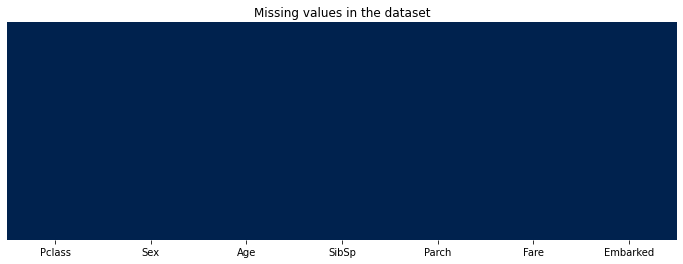

In [455]:
# Reconfirming the operation and any other missing value
missing_plot(test_df1)
# Our set is nice and clean

In [456]:
# Reckecking for missing values since the heat plot is not very honest about small amounts of missing values
missing_percentage(test_df1)

,percent_missing
Pclass,0.000000
Sex,0.000000
Age,0.000000
SibSp,0.000000
Parch,0.000000
Fare,0.239234
Embarked,0.000000


In [457]:
# Droping the minute missing values in Fare column
test_df1.dropna(inplace=True)

In [458]:
# Rechecking for missing values
missing_percentage(test_df1)

,percent_missing
Pclass,0.0
Sex,0.0
Age,0.0
SibSp,0.0
Parch,0.0
Fare,0.0
Embarked,0.0


#### Outliers and anomalies in the numerical columns of the test set

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


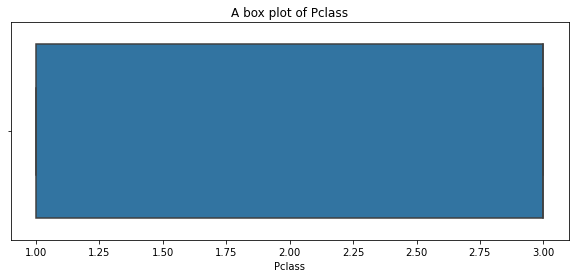

In [459]:
Box_plot(test_df1,'Pclass')
# No outliers nor anomalies detected

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


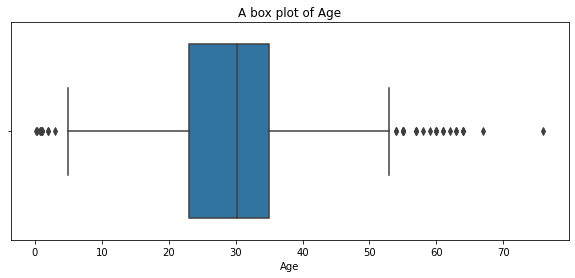

In [461]:
Box_plot(test_df1,'Age')
# Extreeme values detected bt the age is legitimate.
#  It may also be caused by the infilling of the missing values with the mean making it be regarded as an outlier.

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


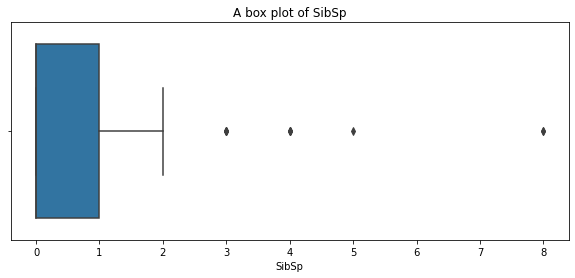

In [466]:
Box_plot(test_df1,'SibSp')
# One extreeme value detected bt it is a legitimate value. You can have more that 8 siblings.

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


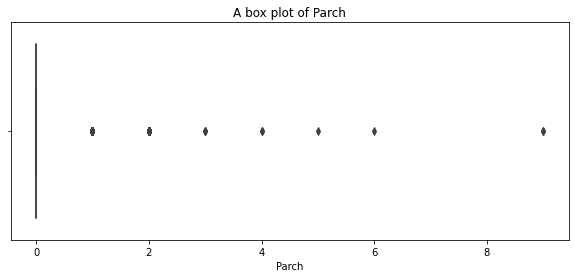

In [467]:
# Checking for null values in the Parent and children dataset
Box_plot(test_df1,'Parch')
# The extreeme values will be treated as legitimate values

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


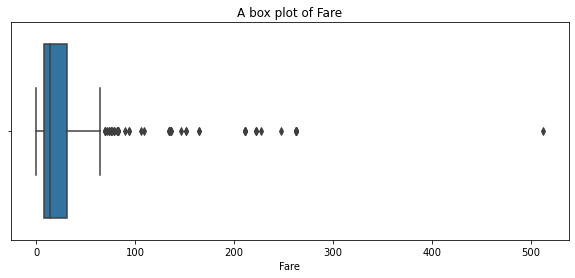

In [468]:
Box_plot(test_df1,'Fare')
# We have an extreeme value way beyond five hundred. 
# The extreeme value is extreeme bt a case of misclassification will be mitigated during standardization in feature engineering.

#### Categorical feature anomaly detection

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


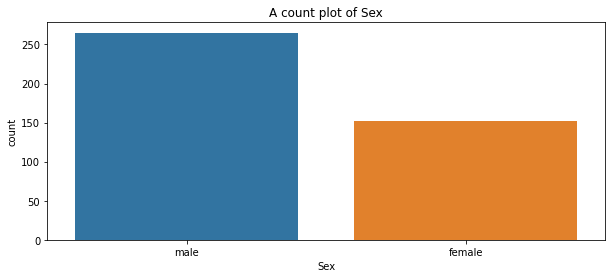

In [470]:
Count_plot(test_df1,'Sex')
# No anomaly detected males were more than females

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


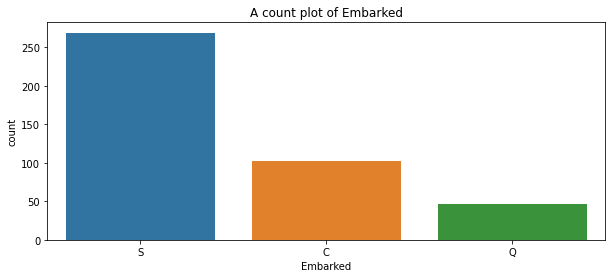

In [471]:
Count_plot(test_df1,'Embarked')

## 6.) Exploratory Data Analysis

#### It is to be noted that most of my dataset is representative from the training set thus EDA will be performed for the training set as it is the most important set to be understood to enable modeling.

In [472]:
train_df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


#### Univariate analysis

## 7.) Implementing the Solution

### a.) Feature Engineering and Preprpcessing proceedures

## 8.) Challenging the solution

## 9.) Follow up questions

### a.) Did we have the right data?

### b.) Do we need other data to answer our question?

### c.) Did we have the right question?

In [465]:
df1=pd.read_csv('spambase\spambase.data.csv',header=None)
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
